<a href="https://colab.research.google.com/github/rabin-sh/AI-ML-Training/blob/Class-3/Class3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banana_quality.csv to banana_quality.csv


In [ ]:
data = pd.read_csv('banana_quality.csv')

In [ ]:
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [ ]:
data.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [ ]:
data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [ ]:
nan_count = data.isnull().sum(axis=0)
nan_count

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
final = data.dropna(axis=0)

In [ ]:
print(final.tail())

          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity Quality  
7995  2.398091     Bad  
7996  2.113136     Bad  
7997  0.697361     Bad  
7998  0.423569     Bad  
7999  1.435644     Bad  


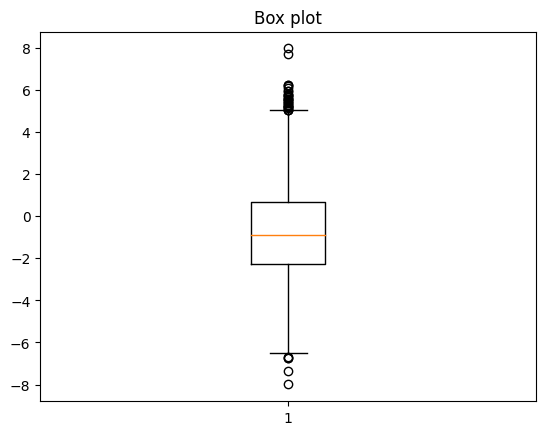

In [ ]:
plt.boxplot(final["Size"])
plt.title('Box plot')
plt.show()

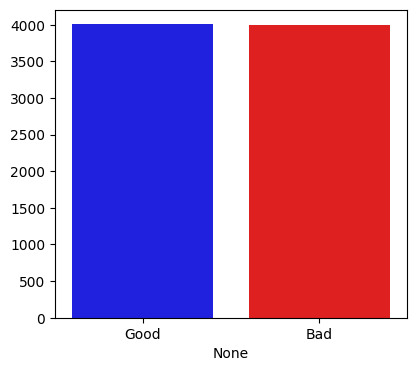

In [ ]:
plt.figure(figsize=(10, 4))
cols = ["blue", "red"]

plt.subplot(1, 2, 1)
sns.barplot(x=data["Quality"].value_counts().index, y=data["Quality"].value_counts(), hue=data["Quality"].value_counts().index, palette=cols, legend=False)
plt.ylabel("")
plt.show()

In [ ]:
for column_name in ['Weight', 'Size', 'Sweetness', 'Ripeness', 'Acidity']:
# Assuming df is your DataFrame and 'column_name' is the column for which you want to check outliers
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the boundary for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get the number of outliers
    outliers = data[(data[column_name] < lower_bound) |
                    (data[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f'There are {num_outliers} outliers.')

There are 3 outliers.
There are 36 outliers.
There are 178 outliers.
There are 58 outliers.
There are 17 outliers.


In [ ]:
num_cols = data.select_dtypes(include=["float64"]).columns

KeyError: 'Size'

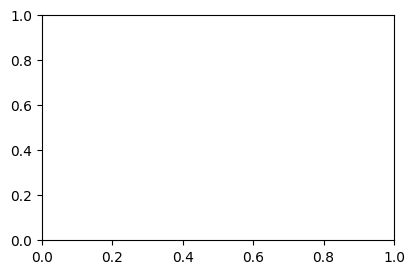

In [ ]:
plt.figure(figsize=(10,24))
j = 1
for i in num_cols:
    plt.subplot(7,2, j)
    sns.boxplot(data[i], color="c")
    plt.subplot(7,2, j+1)
    sns.distplot(data[i], label=f"skewness:{data[i].skew():.2f}", fit=norm)
    j = j +2
    plt.legend(fontsize="small")
    plt.suptitle("Distributions of numerical variables\n\n", fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
[print(data.columns)]

Index(['Softness', 'HarvestTime', 'Quality', 'Adjusted_Acidity',
       'Adjusted_Weight', 'Adjusted_Size', 'Adjusted_Sweetness',
       'Adjusted_Ripeness'],
      dtype='object')


[None]

In [ ]:
for column_name in [ 'Softness', 'HarvestTime', 'Quality', 'Adjusted_Acidity',
       'Adjusted_Weight', 'Adjusted_Size', 'Adjusted_Sweetness',
       'Adjusted_Ripeness']:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f'There are {num_outliers} outliers.')
    data[f'Adjusted_{column_name}'] = np.where((data[column_name] < lower_bound) | (data[column_name] > upper_bound), np.nan, data[column_name])

    mean = data[f'Adjusted_{column_name}'].mean()

    data[f'Adjusted_{column_name}'].fillna(mean, inplace=True)
    data = data.drop(columns=column_name, axis=1)


KeyError: 'Softness'